In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import pandas as pd
%cd "/content/gdrive/My Drive/thesis/Data"

#csv import labels

train_ACL_labels = np.array(pd.read_csv("train-acl.csv", header=None).iloc[:,1])
train_abnormal_labels = np.array(pd.read_csv("train-abnormal.csv", header=None).iloc[:,1])
train_meniscus_labels = np.array(pd.read_csv("train-meniscus.csv", header=None).iloc[:,1])
valid_ACL_labels = np.array(pd.read_csv("valid-acl.csv", header=None).iloc[:,1])
valid_abnormal_labels = np.array(pd.read_csv("valid-abnormal.csv", header=None).iloc[:,1])
valid_meniscus_labels = np.array(pd.read_csv("valid-meniscus.csv", header=None).iloc[:,1])

print('train acl', train_ACL_labels, 'shape', train_ACL_labels.shape)
print('train abn', train_abnormal_labels, 'shape', train_abnormal_labels.shape)
print('train m', train_meniscus_labels, 'shape', train_meniscus_labels.shape)
print('valid acl', valid_ACL_labels, 'shape', valid_ACL_labels.shape)
print('valid abn', valid_abnormal_labels, 'shape', valid_abnormal_labels.shape)
print('valid m', valid_meniscus_labels, 'shape', valid_meniscus_labels.shape)

# order of ABN, ACL, MEN
train_labels = np.concatenate((train_abnormal_labels, train_ACL_labels, train_meniscus_labels), axis=0)
print("train_labels shape", train_labels.shape)
valid_labels = np.concatenate((valid_abnormal_labels, valid_ACL_labels, valid_meniscus_labels), axis=0)
print("valid_labels shape", valid_labels.shape)

#data path
train_path = "/content/gdrive/My Drive/thesis/Data/train"
train_axial_path = "/content/gdrive/My Drive/thesis/Data/train/coronal"


"""
counter = 5
for filename in os.listdir(train_axial_path):
  if counter > 0:
    file0 = np.load(train_axial_path + '/' + filename)
    variancelist = []
    for slice in range(file0.shape[0]):
      variancelist.append(np.var(file0[slice,:,:]))
    print(file0)
    print('mean', np.mean(file0))
    print(filename, 'file shape', file0.shape, 'max_var_index', variancelist.index(max(variancelist)), max(variancelist))
    counter = counter - 1
"""

/content/gdrive/My Drive/thesis/Data
train acl [0 1 0 ... 0 0 1] shape (1130,)
train abn [1 1 1 ... 0 1 1] shape (1130,)
train m [0 1 0 ... 0 0 0] shape (1130,)
valid acl [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0] shape (120,)
valid abn [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] shape (120,)
valid m [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] shape (120,)
[[[ 0  1  3 ...  0  0  0]
  [ 0  2  5

In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.alexnet(pretrained=True)
        #self.model = models.googlenet(pretrained=True)
        #self.model = models.densenet169(pretrained=True)
        #self.model = models.densenet121(pretrained=True)
        #self.model = models.densenet161(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        #self.classifier = nn.Linear(1024, 1)
        self.classifier = nn.Linear(256, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

In [0]:
import argparse
import json
import numpy as np
import os
import torch

from datetime import datetime
from pathlib import Path
from sklearn import metrics

#from evaluate import run_model
#from loader import load_data
#from model import MRNet

def train(rundir, diagnosis, epochs, learning_rate, transformbool, use_gpu):
    
    val_auc_array = np.zeros((9, epochs))
    train_auc_array = np.zeros((9, epochs))
    #train_loader, valid_loader, test_loader = load_data(diagnosis, transformbool, use_gpu)
    train_ax_loader, train_sag_loader, train_cor_loader, valid_ax_loader, valid_sag_loader, valid_cor_loader = load_data(diagnosis, transformbool, use_gpu)

    model = MRNet()
    
    if use_gpu:
        model = model.cuda()

    model_ax_abn = model
    model_ax_acl = model
    model_ax_men = model
    model_sag_abn = model
    model_sag_acl = model
    model_sag_men = model
    model_cor_abn = model
    model_cor_acl = model
    model_cor_men = model

    # modify the code in this
    # try with RAdam
    # grid search?
    # can try without weight decay
    optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=.01)

    # patience too low (after 5 epochs, if AUC hasnt improved, slash learning rate .3), which is why high learning rate seems to work better
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

    best_val_loss = float('inf')

    start_time = datetime.now()

    []


    # maybe this is not necessary ... should have the 9 separate models higher up
    # ax abn
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_abn, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax abn train loss: {train_loss:0.4f}')
      print(f'ax abn train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_abn, valid_ax_loader)
      print(f'ax abn valid loss: {val_loss:0.4f}')
      print(f'ax abn valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax abn val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax ACL
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_acl, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax acl train loss: {train_loss:0.4f}')
      print(f'ax acl train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_acl, valid_ax_loader)
      print(f'ax acl valid loss: {val_loss:0.4f}')
      print(f'ax acl valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax acl val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # sag abn
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_sag_abn, train_sag_loader, train=True, optimizer=optimizer)
      print(f'sag abn train loss: {train_loss:0.4f}')
      print(f'sag abn train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_sag_abn, valid_sag_loader)
      print(f'sag abn valid loss: {val_loss:0.4f}')
      print(f'sag abn valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'sag abn val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)
    
    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)

    # ax men
    for epoch in range(epochs):
      change = datetime.now() - start_time
      print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
      
      train_loss, train_auc, _, _ = run_model(model_ax_men, train_ax_loader, train=True, optimizer=optimizer)
      print(f'ax men train loss: {train_loss:0.4f}')
      print(f'ax men train AUC: {train_auc:0.4f}')

      val_loss, val_auc, _, _ = run_model(model_ax_men, valid_ax_loader)
      print(f'ax men valid loss: {val_loss:0.4f}')
      print(f'ax men valid AUC: {val_auc:0.4f}')
      val_auc_array[0, epoch] = val_auc
      train_auc_array[0, epoch] = train_auc
      
      scheduler.step(val_loss)
      #save last model
      if epoch = epochs-1:
          file_name = f'ax men val{val_loss:0.4f}_train{train_loss:0.4f}_epoch{epoch+1}'
          save_path = Path(rundir) / file_name
          # dont need to save stuff for now, model is too shitty
          #torch.save(model.state_dict(), save_path)
          #if epoch == (epochs-1):
          #  print('model saved at', str(save_path))
          #  torch.save(model.state_dict(), save_path)
            
    return val_auc_array, train_auc_array


In [0]:
# loader.py

!pip install medicaltorch

import numpy as np
import os
import pickle
import torch
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from medicaltorch import transforms as mt_transforms
import PIL
from random import sample

from torch.autograd import Variable

INPUT_DIM = 224
MAX_PIXEL_VAL = 255
#MEAN = 58.09
#STDDEV = 49.73

class Dataset(data.Dataset):
    def __init__(self, datadirs, diagnosis, use_gpu, transformbool):
        super().__init__()
        self.use_gpu = use_gpu
        self.transformbool = transformbool
        label_dict = {}
        self.paths = []
        print(datadirs)
        
        self.diagnosis = diagnosis

        """
        for i, line in enumerate(open('metadata.csv').readlines()):
            if i == 0:
                continue
            line = line.strip().split(',')
            path = line[10]
            label = line[2]
            label_dict[path] = int(int(label) > diagnosis)
        for dir in datadirs:
            for file in os.listdir(dir):
                self.paths.append(dir+'/'+file)

        self.labels = [label_dict[path[6:]] for path in self.paths]

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]
        """

        train_string = "/content/gdrive/My Drive/thesis/Data/train"
        valid_string = "/content/gdrive/My Drive/thesis/Data/valid"

        if os.path.dirname(datadirs) == train_string:
          if diagnosis == 'ACL':
            self.labels = train_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = train_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = train_abnormal_labels
        if os.path.dirname(datadirs) == valid_string:
          if diagnosis == 'ACL':
            self.labels = valid_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = valid_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = valid_abnormal_labels

        direct = datadirs
        for file in os.listdir(direct):
          self.paths.append(direct + '/' + file)
        self.paths.sort()

        #print("paths", self.paths[0:10])

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]

        print(self.labels.shape)
        print(self.weights)


    def weighted_loss(self, prediction, target):
        weights_npy = np.array([self.weights[int(t[0])] for t in target.data])
        weights_tensor = torch.FloatTensor(weights_npy)
        if self.use_gpu:
            weights_tensor = weights_tensor.cuda()
        loss = F.binary_cross_entropy_with_logits(prediction, target, weight=Variable(weights_tensor))
        return loss

      
    # Data augmentation section
    # can go through each cases, looking at the histogram of 3T vs 1.5T (naive distribution of contrast data?)
    def __getitem__(self, index):
        #print('paths', self.paths)
        path = self.paths[index]

        # with open(path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        #    vol = pickle.load(file_handler).astype(np.int32)
        
        vol = np.load(path)

        """
        # crop middle
        pad = int((vol.shape[2] - INPUT_DIM)/2)
        #print('pad', pad)
        vol = vol[:,pad:-pad,pad:-pad]
        #vol = vol[pad:-pad,pad:-pad,:]
  
        # see if theres a way to reformat an image from 196 to 224 
        # something called interpolate, scikit image. 
        # consider scipy zoom too?


        problemflag = False

        if not(vol.shape[1] == 224) or not(vol.shape[2] == 224):
          #print('problem vol shape', vol.shape)
          delta_1 = (INPUT_DIM - vol.shape[1]) // 2
          delta_2 = (INPUT_DIM - vol.shape[2]) // 2
          padding = (delta_1, delta_2)
          new_vol = np.zeros((vol.shape[0], 224, 224), dtype=np.int32)
          for slice in range(vol.shape[0]):
            vol_slice = vol[slice,:,:]
            img_slice = PIL.Image.fromarray(vol_slice)
            new_vol[slice,:,:] = np.array(PIL.ImageOps.fit(img_slice, [224, 224]), dtype='i')
          vol = new_vol  
          vol.astype(np.int32)
          problemflag = True
          #print('vol shape', vol.shape)
          #print('vol type', vol.dtype)

        """
        #MEAN = np.mean(vol)
        #STDDEV = np.std(vol)

        # standardize
        vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL
        #vol = (vol - MEAN) / STDDEV

        vol = vol.astype(np.float32)

        flag = False
        randomangle = 0

        # define transform policy
        hor_flip = np.random.rand(1)
        ran_rot = np.random.rand(1)
        randomangle = np.random.uniform(-20, 20)
        uni_noise = np.random.rand(1)

        if ran_rot < 0.5:
          randomangle = 0

        if self.transformbool:
          #if np.random.rand(1) < 0.5:
          flag = True

          if uni_noise < 0.5:
            noise_array = np.random.uniform(0.8,1.2,256*256)
            noise_array.resize((256,256))
            
            vol = np.multiply(vol, noise_array)
            vol = np.clip(vol, 0, 255)
            vol = vol.astype(np.float32)

            #randomangle = np.random.uniform(-20,20)
          self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            #torchvision.transforms.Resize((224,224)),
            torchvision.transforms.RandomHorizontalFlip(p=(hor_flip < 0.5)), 
            torchvision.transforms.RandomRotation((randomangle,randomangle), resample=PIL.Image.BILINEAR),
            #torchvision.transforms.RandomCrop((224,224),pad_if_needed=True),
            torchvision.transforms.ToTensor()
        ])

        if flag:
          for sliceindex in range(vol.shape[0]):
            vol[sliceindex] = self.transforms(np.array(vol[sliceindex]))


        # standardize
        #vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL

        # normalize
        # problems with the normalization, fix
        # vol = (vol - MEAN) / STDDEV

        # convert to RGB
        #vol = np.stack((vol,)*3, axis=1)
        #print('vol2', vol.shape)

        #new_vol = self.transforms(vol).float()
        #print('new_vol', new_vol.shape)

        """
        if uni_noise < 0.5:
          save_fig = PIL.Image.fromarray(np.uint8(np.array(vol[15,:,:])))
          save_fig = save_fig.convert("L")
          #save_fig.show()
          #file_name = f'path{path}_transform{flag}_angle{randomangle:0.4f}'
          newpath = str(path).replace('/', ' ')
          file_name = "path" + newpath + " transform" + str(flag) + " angle" + str(round(randomangle)) + "_2.png"
          save_path = Path(rundir) / "noise" /  file_name
          save_fig.save(save_path)
        """
        #assert(1==2)
        vol = np.stack((vol,)*3, axis=1)

        #print('volume shape', vol.shape)

        vol_tensor = torch.FloatTensor(vol)
        label_tensor = torch.FloatTensor([self.labels[index]])
        #print('vol tensor shape', vol_tensor.shape)
        #print('label_tensor shape', label_tensor.shape)
        #assert(1==3)
        return vol_tensor, label_tensor

    def __len__(self):
        return len(self.paths)

def load_data(diagnosis, transformbool, use_gpu=True):

    print('load_data', diagnosis)

    train_path = "/content/gdrive/My Drive/thesis/Data/train"
    valid_path = "/content/gdrive/My Drive/thesis/Data/valid"

    batchsize = 1
    numworkers = 4
    
    #assert(1==2)
    #train_dataset = Dataset(train_path, diagnosis, use_gpu, transformbool)
    train_ax = Dataset(train_path + '/axial', diagnosis, use_gpu, transformbool)
    train_sag = Dataset(train_path + '/sagittal', diagnosis, use_gpu, transformbool)
    train_cor = Dataset(train_path + '/coronal', diagnosis, use_gpu, transformbool)
    valid_ax = Dataset(valid_path + '/axial', diagnosis, use_gpu, False)
    valid_sag = Dataset(valid_path + '/sagittal', diagnosis, use_gpu, False)
    valid_cor = Dataset(valid_path + '/coronal', diagnosis, use_gpu, False)
    #valid_dataset = Dataset(valid_path, diagnosis, use_gpu, False)
    #test_dataset = Dataset(test_dirs, /diagnosis, use_gpu, False)

    train_ax_loader = data.DataLoader(train_ax, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    train_sag_loader = data.DataLoader(train_sag, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    train_cor_loader = data.DataLoader(train_cor, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    valid_ax_loader = data.DataLoader(valid_ax, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    valid_sag_loader = data.DataLoader(valid_sag, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    valid_cor_loader = data.DataLoader(valid_cor, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    #train_loader = data.DataLoader(train_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    #valid_loader = data.DataLoader(valid_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    #test_loader = data.DataLoader(test_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    #return train_loader, valid_loader, valid_loader #test_loader
    return train_ax_loader, train_sag_loader, train_cor_loader, valid_ax_loader, valid_sag_loader, valid_cor_loader


In [0]:
# evaluate.py

import argparse
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

from sklearn import metrics
from torch.autograd import Variable

#from loader import load_data
#from model import MRNet

def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument('--model_path', type=str, required=True)
    parser.add_argument('--split', type=str, required=True)
    parser.add_argument('--diagnosis', type=int, required=True)
    parser.add_argument('--gpu', action='store_true')
    return parser

def run_model(model, loader, train=False, optimizer=None):
    preds = []
    labels = []

    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.
    num_batches = 0

    for batch in loader:
        if train:
            optimizer.zero_grad()

        vol, label = batch
        if loader.dataset.use_gpu:
            vol = vol.cuda()
            label = label.cuda()
        vol = Variable(vol)
        label = Variable(label)

        logit = model.forward(vol)

        loss = loader.dataset.weighted_loss(logit, label)
        total_loss += loss.item()

        pred = torch.sigmoid(logit)
        pred_npy = pred.data.cpu().numpy()[0][0]
        label_npy = label.data.cpu().numpy()[0][0]

        preds.append(pred_npy)
        labels.append(label_npy)

        if train:
            loss.backward()
            optimizer.step()
        num_batches += 1

    avg_loss = total_loss / num_batches

    fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    auc = metrics.auc(fpr, tpr)

    return avg_loss, auc, preds, labels

def evaluate(split, model_path, diagnosis, use_gpu):
    train_loader, valid_loader, test_loader = load_data(diagnosis, transformbool, use_gpu)
    model = MRNet()
    state_dict = torch.load(model_path, map_location=(None if use_gpu else 'cpu'))
    model.load_state_dict(state_dict)

    if use_gpu:
        model = model.cuda()

    if split == 'train':
        loader = train_loader
    elif split == 'valid':
        loader = valid_loader
    elif split == 'test':
        loader = test_loader
    else:
        raise ValueError("split must be 'train', 'valid', or 'test'")

    loss, auc, preds, labels = run_model(model, loader)

    print(f'{split} loss: {loss:0.4f}')
    print(f'{split} AUC: {auc:0.4f}')

    return preds, labels

#if __name__ == '__main__':
#    args = get_parser().parse_args()
#   evaluate(args.split, args.model_path, args.diagnosis, args.gpu)

In [0]:
gpu = True
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#learningrate = 5e-05
epochs = 80
#diagnosis = 'ACL'
rundir = "/content/gdrive/My Drive/thesis/Data"

if gpu:
  torch.cuda.manual_seed_all(seed)

# larger learning rates
learn1 = 0.001
learn2 = 0.001
learn3 = 0.001
learn4 = 0.001
learn5 = 0.001

#varray1, tarray1 = train(rundir, diagnosis, epochs, learn1, gpu)
#varray2, tarray2 = train(rundir, diagnosis, epochs, learn2, gpu)
#varray3, tarray3 = train(rundir, diagnosis, epochs, learn3, gpu)
#varray4, tarray4 = train(rundir, diagnosis, epochs, learn4, gpu)
#varray5, tarray5 = train(rundir, diagnosis, epochs, learn5, gpu)

#varray2, tarray2 = varray1, tarray1
#varray3, tarray3 = varray1, tarray1
#varray4, tarray4 = varray1, tarray1
#varray5, tarray5 = varray1, tarray1

def display_single(x_length, lr1, varray, tarray, title, xlabel, ylabel):
  plt.figure(0)
  plt.title(title)
  plt.plot(np.arange(x_length), varray, label='valid')
  plt.plot(np.arange(x_length), tarray, label='train')
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

def display_line(x_length, lr1, y1, lr2, y2, lr3, y3, lr4, y4, lr5, y5, title, xlabel, ylabel):
  plt.figure(0)
  # see if we can set axis later
  #ax = plt.axis()
  #ax.set(xlim = (np.min(x),np.max(x)), option='tight')
  plt.title(title)
  plt.plot(np.arange(x_length), y1, label=str(lr1))
  plt.plot(np.arange(x_length), y2, label=str(lr2))
  plt.plot(np.arange(x_length), y3, label=str(lr3))
  plt.plot(np.arange(x_length), y4, label=str(lr4))
  plt.plot(np.arange(x_length), y5, label=str(lr5))
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

#display_line(epochs, learn1, varray1, learn2, varray2, learn3, varray3, learn4, varray4, learn5, varray5, "Trained AlexNet Val AUC over epochs diagnosis = " + str(diagnosis), "epoch", "Validation AUC")
#display_line(epochs, learn1, tarray1, learn2, tarray2, learn3, tarray3, learn4, tarray4, learn5, tarray5, "Trained AlexNet Train AUC over epochs diagnosis = " + str(diagnosis), "epoch", "Training AUC")

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:01<00:00, 146MB/s]


starting epoch 1. time passed: 0:00:00.000016
train loss: 303020.5782
train AUC: 0.5269
valid loss: 0.4003
valid AUC: 0.4456
starting epoch 2. time passed: 0:04:40.526811
train loss: 601.2004
train AUC: 0.4947
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 3. time passed: 0:05:43.874950
train loss: 78834.9430
train AUC: 0.5028
valid loss: 0.4217
valid AUC: 0.4301
starting epoch 4. time passed: 0:06:47.280820
train loss: 0.2183
train AUC: 0.5032
valid loss: 0.3438
valid AUC: 0.5000
starting epoch 5. time passed: 0:07:51.500873
train loss: 1000.1436
train AUC: 0.5165
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 6. time passed: 0:08:55.836908
train loss: 3719.6646
train AUC: 0.4675
valid loss: 19.9771
valid AUC: 0.4850
starting epoch 7. time passed: 0:10:00.450492
train loss: 25.7795
train AUC: 0.4729
valid loss: 0.3432
valid AUC: 0.5000
starting epoch 8. time passed: 0:11:04.501470
train loss: 2.2623
train AUC: 0.4781
valid loss: 0.3435
valid AUC: 0.5000
starting epoch 9. tim

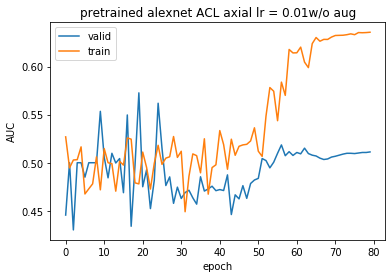

In [0]:
#axial w/o aug
epochs = 80
diagnosis = 'ACL'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
train loss: 44332.0380
train AUC: 0.5063
valid loss: 0.3516
valid AUC: 0.4683
starting epoch 2. time passed: 0:01:41.604253
train loss: 0.8436
train AUC: 0.5186
valid loss: 0.3433
valid AUC: 0.5000
starting epoch 3. time passed: 0:03:24.504865
train loss: 69.0491
train AUC: 0.4896
valid loss: 0.3549
valid AUC: 0.5048
starting epoch 4. time passed: 0:05:07.791744
train loss: 69.6932
train AUC: 0.4726
valid loss: 0.3673
valid AUC: 0.5222
starting epoch 5. time passed: 0:06:51.431241
train loss: 2.4744
train AUC: 0.4778
valid loss: 46.3898
valid AUC: 0.5028
starting epoch 6. time passed: 0:08:34.481834
train loss: 140.5830
train AUC: 0.5309
valid loss: 0.8721
valid AUC: 0.4531
starting epoch 7. time passed: 0:10:17.922599
train loss: 13.0559
train AUC: 0.4597
valid loss: 0.

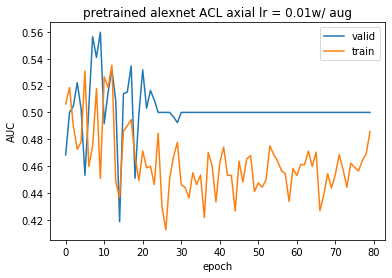

In [0]:
#axial w/ aug
diagnosis = 'ACL'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000015
train loss: 1.4946
train AUC: 0.4922
valid loss: 0.3437
valid AUC: 0.4933
starting epoch 2. time passed: 0:03:15.970651
train loss: 0.5840
train AUC: 0.5122
valid loss: 0.3426
valid AUC: 0.5974
starting epoch 3. time passed: 0:04:18.712465
train loss: 0.8667
train AUC: 0.4802
valid loss: 0.3378
valid AUC: 0.6703
starting epoch 4. time passed: 0:05:18.639777
train loss: 0.3141
train AUC: 0.5213
valid loss: 0.3479
valid AUC: 0.3465
starting epoch 5. time passed: 0:06:18.270841
train loss: 0.2635
train AUC: 0.4349
valid loss: 0.3433
valid AUC: 0.3361
starting epoch 6. time passed: 0:07:18.510426
train loss: 0.2140
train AUC: 0.4921
valid loss: 0.3432
valid AUC: 0.3451
starting epoch 7. time passed: 0:08:18.729568
train loss: 0.2083
train AUC: 0.4873
valid loss: 0.3431
va

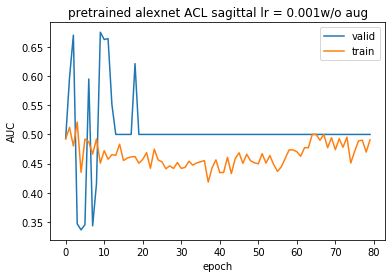

In [0]:
#sag w/o aug
diagnosis = 'ACL'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000013
train loss: 6.1967
train AUC: 0.4877
valid loss: 0.3443
valid AUC: 0.4287
starting epoch 2. time passed: 0:01:29.088335
train loss: 0.6017
train AUC: 0.5046
valid loss: 0.3535
valid AUC: 0.6322
starting epoch 3. time passed: 0:02:58.983452
train loss: 0.2218
train AUC: 0.4947
valid loss: 0.3435
valid AUC: 0.3673
starting epoch 4. time passed: 0:04:30.045093
train loss: 0.6608
train AUC: 0.4449
valid loss: 0.3508
valid AUC: 0.3858
starting epoch 5. time passed: 0:06:01.204638
train loss: 0.5236
train AUC: 0.4578
valid loss: 0.3443
valid AUC: 0.3162
starting epoch 6. time passed: 0:07:32.750608
train loss: 0.2092
train AUC: 0.4845
valid loss: 0.3447
valid AUC: 0.3027
starting epoch 7. time passed: 0:09:03.863678
train loss: 2.1873
train AUC: 0.4618
valid loss: 0.3434
va

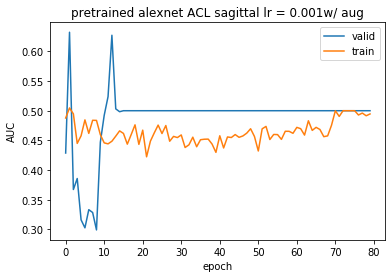

In [0]:
#sag w/ aug
diagnosis = 'ACL'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000014
train loss: 6827.7595
train AUC: 0.5004
valid loss: 0.3438
valid AUC: 0.4663
starting epoch 2. time passed: 0:03:21.371233
train loss: 0.8213
train AUC: 0.4844
valid loss: 0.3433
valid AUC: 0.4169
starting epoch 3. time passed: 0:04:24.895508
train loss: 1163.5182
train AUC: 0.4924
valid loss: 0.3386
valid AUC: 0.4907
starting epoch 4. time passed: 0:05:23.539125
train loss: 20.4950
train AUC: 0.4880
valid loss: 4.1258
valid AUC: 0.4818
starting epoch 5. time passed: 0:06:22.058104
train loss: 110.5158
train AUC: 0.4953
valid loss: 46.7779
valid AUC: 0.4933
starting epoch 6. time passed: 0:07:20.689425
train loss: 17.5867
train AUC: 0.5310
valid loss: 2.3874
valid AUC: 0.5128
starting epoch 7. time passed: 0:08:19.051762
train loss: 463.7495
train AUC: 0.4977
valid los

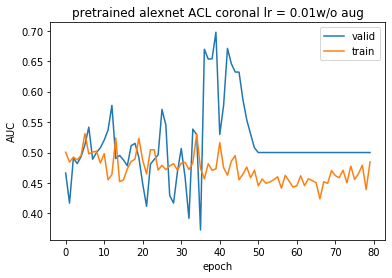

In [0]:
#cor w/o aug
diagnosis = 'ACL'
lr = 0.01
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.184070796460177, 0.815929203539823]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
starting epoch 1. time passed: 0:00:00.000014
train loss: 0.2856
train AUC: 0.5612
valid loss: 0.3374
valid AUC: 0.5847
starting epoch 2. time passed: 0:01:44.199051
train loss: 0.2310
train AUC: 0.5489
valid loss: 0.3403
valid AUC: 0.6105
starting epoch 3. time passed: 0:03:27.979592
train loss: 0.2453
train AUC: 0.5580
valid loss: 0.3811
valid AUC: 0.5087
starting epoch 4. time passed: 0:05:11.360447
train loss: 0.2179
train AUC: 0.5309
valid loss: 0.3425
valid AUC: 0.5328
starting epoch 5. time passed: 0:06:53.866122
train loss: 0.2083
train AUC: 0.5472
valid loss: 0.3390
valid AUC: 0.6027
starting epoch 6. time passed: 0:08:37.477473
train loss: 0.2228
train AUC: 0.5544
valid loss: 0.3426
valid AUC: 0.5247
starting epoch 7. time passed: 0:10:18.706770
train loss: 0.2087
train AUC: 0.5223
valid loss: 0.3382
val

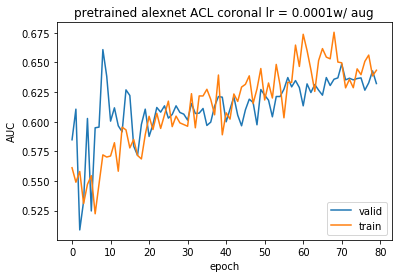

In [0]:
#cor w/ aug
diagnosis = 'ACL'
lr = 0.0001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:04<00:00, 59.2MB/s]


starting epoch 1. time passed: 0:00:00.000012
train loss: 0.7407
train AUC: 0.4894
valid loss: 0.3398
valid AUC: 0.6015
starting epoch 2. time passed: 0:02:55.895788
train loss: 0.3201
train AUC: 0.5196
valid loss: 0.3402
valid AUC: 0.5814
starting epoch 3. time passed: 0:03:51.406959
train loss: 0.3340
train AUC: 0.5053
valid loss: 0.3404
valid AUC: 0.4665
starting epoch 4. time passed: 0:04:45.740098
train loss: 0.3161
train AUC: 0.4528
valid loss: 0.3404
valid AUC: 0.6134
starting epoch 5. time passed: 0:05:39.917149
train loss: 0.3896
train AUC: 0.4931
valid loss: 0.3404
valid AUC: 0.5591
starting epoch 6. time passed: 0:06:33.570808
train loss: 0.3216
train AUC: 0.4599
valid loss: 0.3404
valid AUC: 0.5249
starting epoch 7. time passed: 0:07:28.152116
train loss: 0.3161
train AUC: 0.4484
valid loss: 0.3404
valid AUC: 0.5358
starting epoch 8. time passed: 0:08:22.743304
train loss: 0.3160
train AUC: 0.4610
valid loss: 0.3404
valid AUC: 0.4926
starting epoch 9. time passed: 0:09:16.9

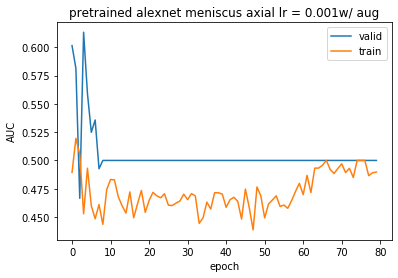

In [0]:
#axial w/o aug
diagnosis = 'meniscus'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000010
train loss: 1.7172
train AUC: 0.5225
valid loss: 0.3400
valid AUC: 0.6080
starting epoch 2. time passed: 0:01:25.509424
train loss: 0.3464
train AUC: 0.5304
valid loss: 0.3415
valid AUC: 0.5065
starting epoch 3. time passed: 0:02:51.348184
train loss: 0.6461
train AUC: 0.5184
valid loss: 0.3406
valid AUC: 0.4115
starting epoch 4. time passed: 0:04:17.799896
train loss: 0.3198
train AUC: 0.4751
valid loss: 0.3404
valid AUC: 0.5452
starting epoch 5. time passed: 0:05:44.477809
train loss: 0.3208
train AUC: 0.5262
valid loss: 0.3397
valid AUC: 0.6270
starting epoch 6. time passed: 0:07:10.660452
train loss: 0.3700
train AUC: 0.5279
valid loss: 0.3404
valid AUC: 0.5445
starting epoch 7. time passed: 0:08:36.704571
train loss: 0.3161
train 

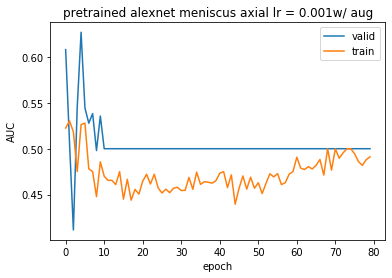

In [0]:
#axial w/ aug
diagnosis = 'meniscus'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000011
train loss: 0.6928
train AUC: 0.5070
valid loss: 0.3392
valid AUC: 0.5744
starting epoch 2. time passed: 0:03:22.730181
train loss: 0.3247
train AUC: 0.4698
valid loss: 0.3404
valid AUC: 0.5246
starting epoch 3. time passed: 0:04:18.134887
train loss: 0.4835
train AUC: 0.4453
valid loss: 0.3410
valid AUC: 0.5079
starting epoch 4. time passed: 0:05:06.878532
train loss: 0.3775
train AUC: 0.4792
valid loss: 0.3406
valid AUC: 0.4516
starting epoch 5. time passed: 0:05:55.636907
train loss: 0.3167
train AUC: 0.4613
valid loss: 0.3404
valid AUC: 0.5079
starting epoch 6. time passed: 0:06:44.364307
train loss: 0.3161
train AUC: 0.4869
valid loss: 0.3404
valid AUC: 0.4727
starting epoch 7. time passed: 0:07:33.311564
train loss: 0.3160
trai

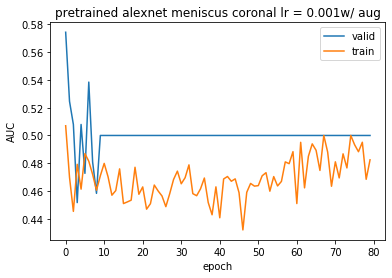

In [0]:
#coronal w/o aug
diagnosis = 'meniscus'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, False, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/o aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000014
train loss: 1.3642
train AUC: 0.5363
valid loss: 0.3490
valid AUC: 0.5334
starting epoch 2. time passed: 0:02:27.367700
train loss: 0.7303
train AUC: 0.4675
valid loss: 0.3405
valid AUC: 0.5136
starting epoch 3. time passed: 0:03:47.784624
train loss: 0.3243
train AUC: 0.4884
valid loss: 0.3405
valid AUC: 0.4723
starting epoch 4. time passed: 0:05:07.676133
train loss: 0.3215
train AUC: 0.4717
valid loss: 0.3425
valid AUC: 0.4683
starting epoch 5. time passed: 0:06:28.673176
train loss: 0.3334
train AUC: 0.5038
valid loss: 0.3404
valid AUC: 0.5757
starting epoch 6. time passed: 0:07:49.899013
train loss: 0.6901
train AUC: 0.4877
valid loss: 0.3404
valid AUC: 0.5551
starting epoch 7. time passed: 0:09:11.191848
train loss: 0.3170
trai

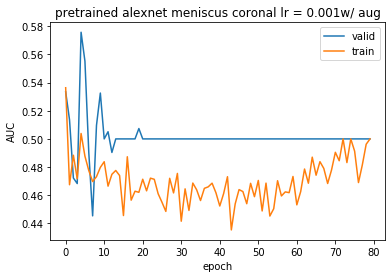

In [0]:
# trying noise
#coronal w aug
diagnosis = 'meniscus'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

In [0]:
# trying noise
#coronal w aug
epochs = 240
diagnosis = 'meniscus'
lr = 0.001
varray1, tarray1 = train(rundir, diagnosis, epochs, lr, True, gpu)
title = 'pretrained alexnet ' + diagnosis + ' ' + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, title + 'w/ aug', 'epoch', 'AUC')

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1130,)
[0.3513274336283186, 0.6486725663716815]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
starting epoch 1. time passed: 0:00:00.000012
train loss: 0.7321
train AUC: 0.5075
valid loss: 0.4558
valid AUC: 0.5348
starting epoch 2. time passed: 0:01:18.825585
train loss: 1.1970
train AUC: 0.5066
valid loss: 0.3403
valid AUC: 0.5427
starting epoch 3. time passed: 0:02:37.808905
train loss: 0.3267
train AUC: 0.4706
valid loss: 0.3399
valid AUC: 0.5659
starting epoch 4. time passed: 0:03:57.046159
train loss: 0.3205
train AUC: 0.5223
valid loss: 0.3404
valid AUC: 0.5328
starting epoch 5. time passed: 0:05:16.424797
train loss: 0.3161
train AUC: 0.4575
valid loss: 0.3404
valid AUC: 0.6178
starting epoch 6. time passed: 0:06:35.935484
train loss: 0.3160
train AUC: 0.4808
valid loss: 0.3404
valid AUC: 0.4801
starting epoch 7. time passed: 0:07:55.017141
train loss: 0.3161
trai

In [0]:

#evaluate('test', 'val0.0175_train0.0139_epoch50', 1, True)

In [0]:

def display1_line(x_length, lr1, y1, lr2, y2, lr3, y3, lr4, y4, lr5, y5, title, xlabel, ylabel):
  plt.figure(0)
  # see if we can set axis later
  #ax = plt.axis()
  #ax.set(xlim = (np.min(x),np.max(x)), option='tight')
  plt.title(title)
  plt.plot(np.arange(x_length), y1, label=str(lr1))
  plt.plot(np.arange(x_length), y2, label=str(lr2))
  plt.plot(np.arange(x_length), y3, label=str(lr3))
  plt.plot(np.arange(x_length), y4, label=str(lr4))
  plt.plot(np.arange(x_length), y5, label=str(lr5))
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

display1_line(epochs, 5e-06, varray1, 1e-05, varray2, 5e-05, varray3, 1e-04, varray4, 1e-03, varray5, "AUC loss over epochs diagnosis = " + str(diagnosis), "epoch", "Validation AUC")

In [0]:
# notes from ben
# get rid of double standardization, dont have RGB channels all have same information, make AlexNet take 1 channel instead of 3. 
# try to dissect images into two camps, 3.0T and 1.5T.
# Then we can try to change into DenseNets. 

In [0]:
p-values[rot, crop, shift] = [0.3, 0.4, 0.5]

for every image in folder:
  load image

  if random number generator < p-values rot:
    image = rotate image (by x degrees)
  if random number generator < p-values crop:
    image = crop image (by x,y values)
  if random number generator < p-values shift:
    image = shift image (by x values in y direction)

  convert image into tensor for processing
  send image to training batch, grab next image

In [0]:
define initial state of model
(Lets say a simple model of 3 layers, with ReLU activation functions and
 down-sampling method of max pool. Input image is 256x256)
features = Sequential model: 
  Layer: Convolutional 2 dimensional (256 input, 128 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool
  Layer: Convolutional 2 dimensional (128 input, 64 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool
  Layer: Convolutional 2 dimensional (64 input, 32 output, padding = 2)
  Activation Function: ReLU
  Down-Sample: maxpool

  Layer: Softmax (to convert a 32x32 matrix to probability distribution used to classify)
